## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
from tensorflow import keras


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(512, activation='relu')(input_layer)
    x = keras.layers.Dense(256, activation='relu')(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    out = keras.layers.Dense(10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 77us/sample - loss: 1.9465 - accuracy: 0.2889 - val_loss: 1.7902 - val_accuracy: 0.3659
Epoch 2/500
50000/50000 [==============================] - 2s 45us/sample - loss: 1.7175 - accuracy: 0.3848 - val_loss: 1.6956 - val_accuracy: 0.3883
Epoch 3/500
50000/50000 [==============================] - 2s 41us/sample - loss: 1.6237 - accuracy: 0.4174 - val_loss: 1.5648 - val_accuracy: 0.4432
Epoch 4/500
50000/50000 [==============================] - 2s 40us/sample - loss: 1.5570 - accuracy: 0.4426 - val_loss: 1.5813 - val_accuracy: 0.4431
Epoch 5/500
50000/50000 [==============================] - 2s 40us/sample - loss: 1.5227 - accuracy: 0.4528 - val_loss: 1.5400 - val_accuracy: 0.4501
Epoch 6/500
50000/50000 [==============================] - 2s 41us/sample - loss: 1.4724 - accuracy: 0.4736 - val_loss: 1.4790 - val_accuracy: 0.4710
Epoch 7/500
50000/50000 [=========================

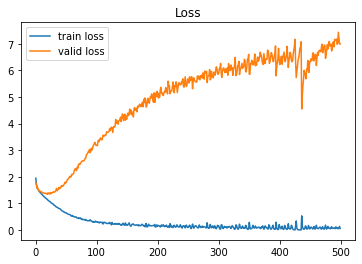

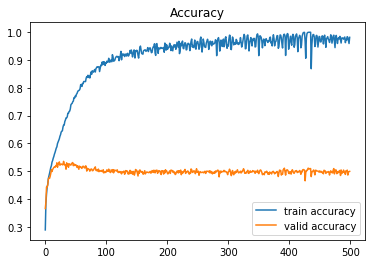

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### 將Optimizer換成SGD

In [11]:
"""
Compile 模型
"""
model = build_mlp()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 65us/sample - loss: 2.2824 - accuracy: 0.1419 - val_loss: 2.2515 - val_accuracy: 0.1537
Epoch 2/100
50000/50000 [==============================] - 3s 54us/sample - loss: 2.2275 - accuracy: 0.1765 - val_loss: 2.2062 - val_accuracy: 0.1988
Epoch 3/100
50000/50000 [==============================] - 2s 41us/sample - loss: 2.1848 - accuracy: 0.2048 - val_loss: 2.1657 - val_accuracy: 0.2177
Epoch 4/100
50000/50000 [==============================] - 2s 38us/sample - loss: 2.1449 - accuracy: 0.2282 - val_loss: 2.1276 - val_accuracy: 0.2421
Epoch 5/100
50000/50000 [==============================] - 2s 46us/sample - loss: 2.1072 - accuracy: 0.2493 - val_loss: 2.0920 - val_accuracy: 0.2581
Epoch 6/100
50000/50000 [==============================] - 2s 49us/sample - loss: 2.0727 - accuracy: 0.2660 - val_loss: 2.0594 - val_accuracy: 0.2726
Epoch 7/100
50000/50000 [=========================

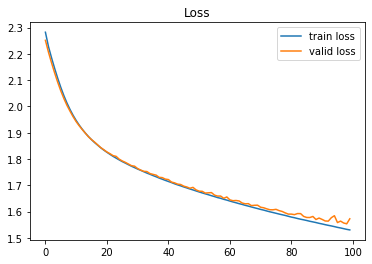

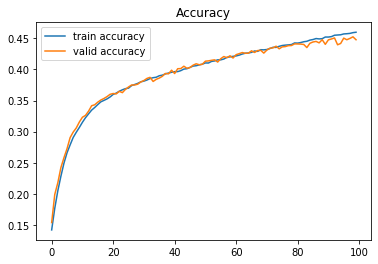

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()